# 커넥트4

* 커넥트4 개요

바닥부터 돌이 쌓이는 4단 틱택토인 '커넥트4'를 구현한다.
두 플레이어가 교대로 7 * 6의 보드면에 아래부터 돌을 쌓아 올린다.
먼저 가로, 세로, 대각선 방향 중 하나로 4개의 돌을 나란히 놓는 편이 승리.
커넥트4 UI의 돌을 놓은 열은 클릭으로 지정.
또한, 간이화했으므로 사람은 항상 선 수를 둔다.
이전 틱택토의 코드와는 약간의 차이가 있다.
게임 상태(game.py)와 게임 UI는 게임 자체가 다르므로 모두 업데이트하고,
듀얼 네트워크(dual_network.py)는 파라미터만 업데이터하며,
학습 사이클 실행(train_cycle.py)는 베스트 플레이어 평가 부분만을 삭제한다.

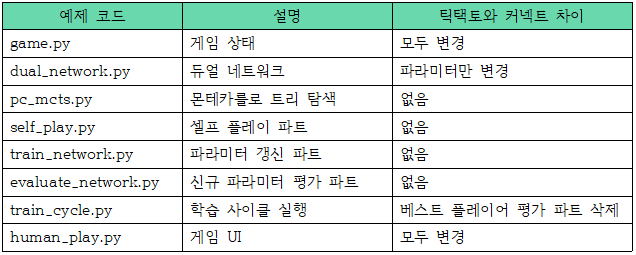




# 커넥트4의 듀얼 네트워크 입력

커넥트4의 듀얼 네트워크에는 '게임 판면이 입력된다.

이번에는 게임 보드면을 '자신의 돌의 위치', '상대방의 돌의 위치' 두 가지의 2차원 배열로 입력한다. 구체적으로는 7*6의 2차원 배열 2개로 입력 형태는 (7,6,2)이며, 돌이 놓여있는 경우에는 1, 그렇지 않은 경우에는 0이 된다.

- 자신의 돌의 위치(7*6 사이즈의 2차원 배열)
- 상대방의 돌의 위치(7*6 사이즈의 2차원 배열)

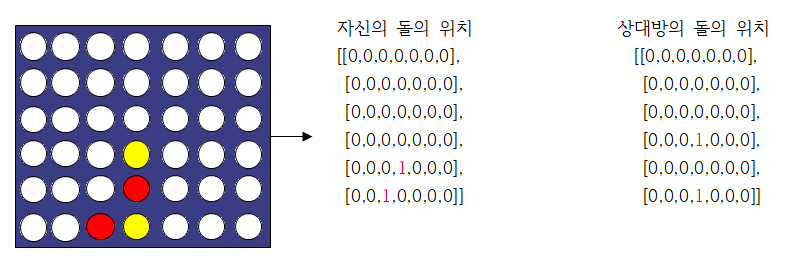

# 커넥트4에서의 행동

커넥트4의 행동은 돌을 떨어뜨릴 열(0~6)이다. 선택한 열에서 아직 돌이 놓이지 않은 가장 아래 위치에 돌이 놓인다. 행동 수는 7(열 수)이다.

# 학습 사이클 실행

* 학습 사이클 정의

먼저, 듀얼 네트워크를 생성한 후, 셀프 플레이 파트, 파라미터 갱신 파트, 신규 파라미터 평가 파트를 반복한다.

* 학습 사이클 실행

* 학습 재개

베스트 플레이어 모델('./model/best.h5')을 가진 상태에서 'train_cycle.py'를 실행해 다시 학습할 수 있다.

10 사이클 정도의 학습으로 충분히 강력해지지 않은 경우에는 다시 학습을 계속한다. 30 사이클 정도 학습하면 MCTS에 대한 승률은 70% 정도 향상된다. 

In [ ]:
# 샘플 파일 소스 코드 1 세트 업로드
from google.colab import files
uploaded = files.upload()

Saving dual_network.py to dual_network.py
Saving evaluate_best_player.py to evaluate_best_player.py
Saving evaluate_network.py to evaluate_network.py
Saving game.py to game.py
Saving pv_mcts.py to pv_mcts.py
Saving self_play.py to self_play.py
Saving train_cycle.py to train_cycle.py
Saving train_network.py to train_network.py


In [ ]:
# 폴더 확인
!dir

dual_network.py		 evaluate_network.py  pv_mcts.py    train_cycle.py
evaluate_best_player.py  game.py	      self_play.py  train_network.py


In [ ]:
# 학습 사이클 실행
!python train_cycle.py

2021-04-30 15:01:23.332508: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-30 15:01:24.944858: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-30 15:01:24.945956: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-30 15:01:25.010042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-30 15:01:25.010651: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-04-30 15:01:25.010703: I tensorflow/stream_executor/platform/default/dso_loade

In [ ]:
# best.h5 다운로드
from google.colab import files
files.download('./model/best.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>